20241029T090339_4266917927872453_2.0.wav


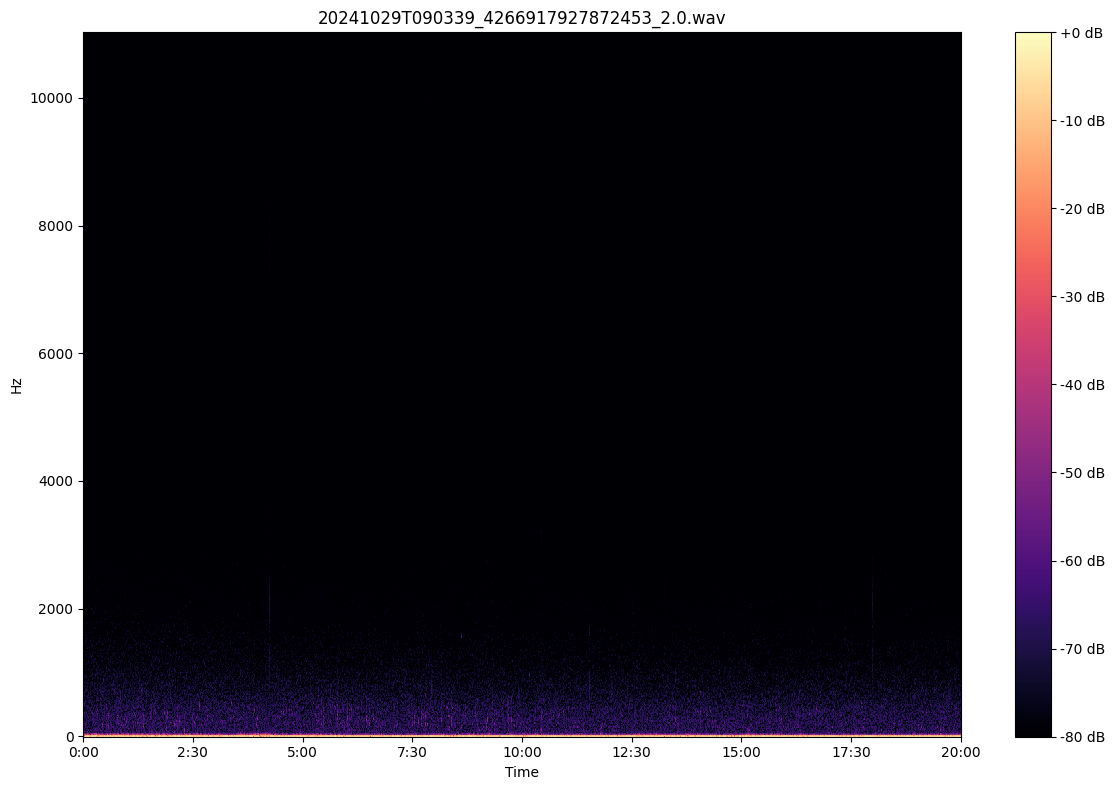

20241029T092339_4266917927872453_2.0.wav


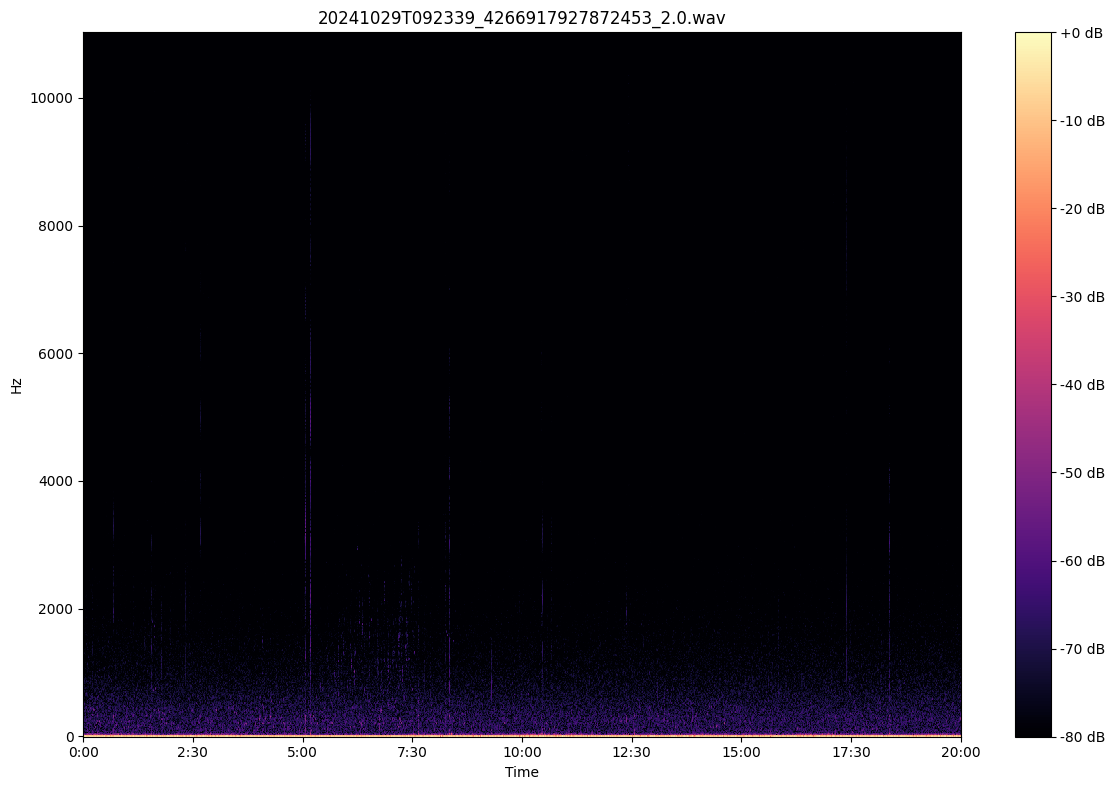

20241029T094338_4266917927872453_2.0.wav


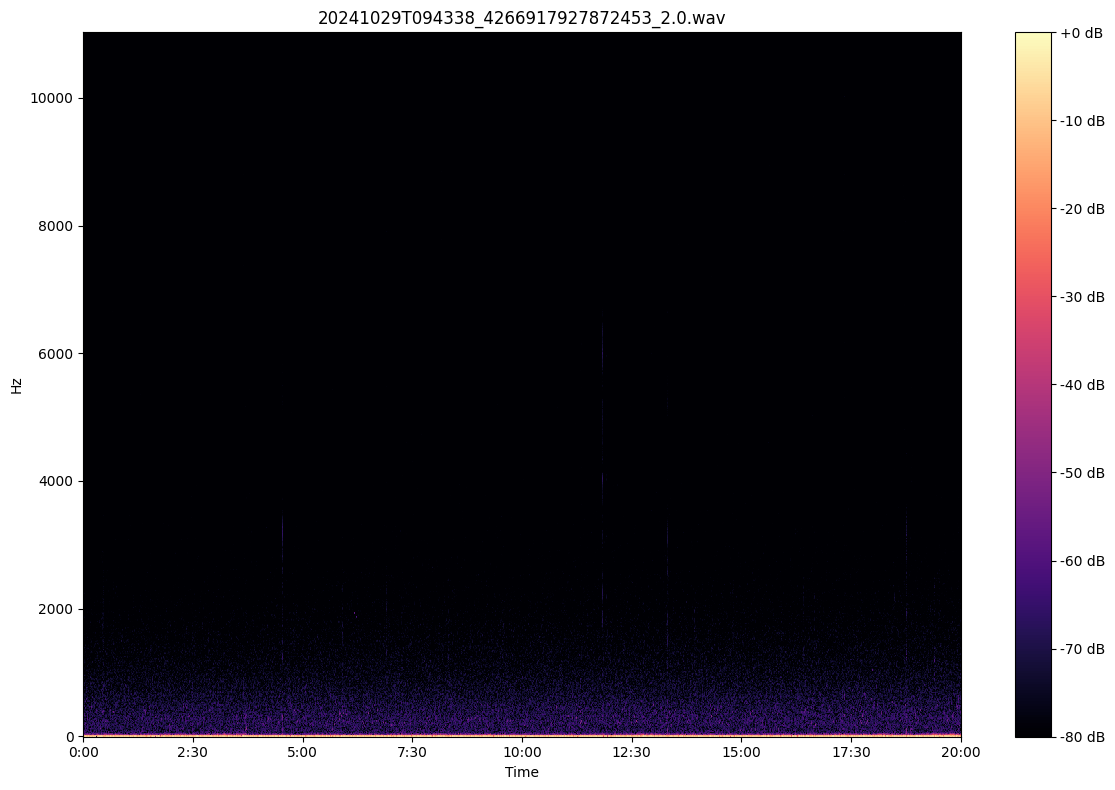

20241029T100338_4266917927872453_2.0.wav


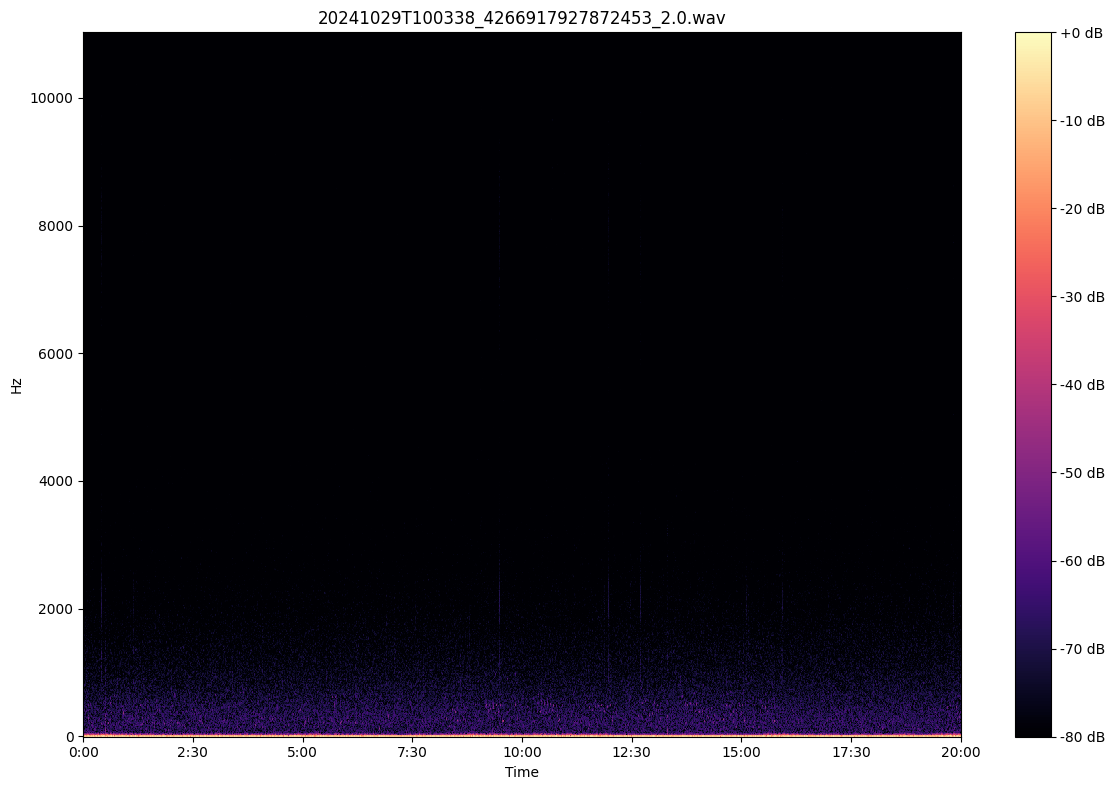

20241029T102338_4266917927872453_2.0.wav


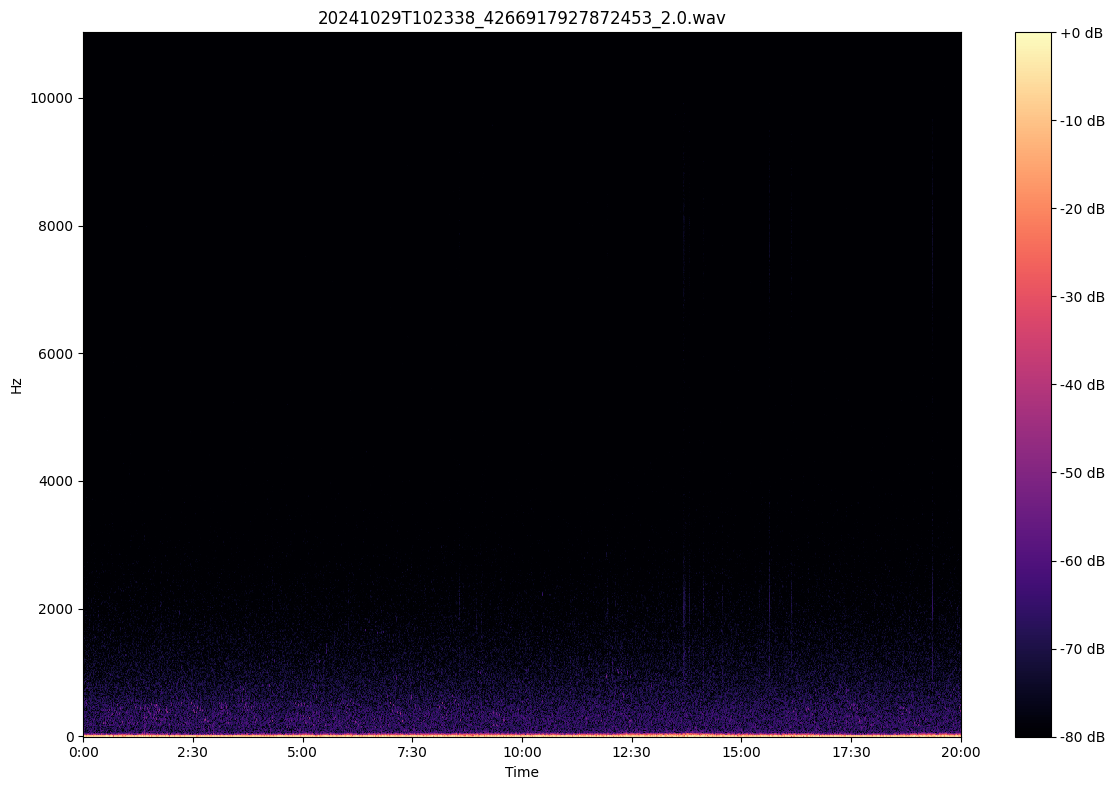

20241029T104340_4266917927872453_2.0.wav


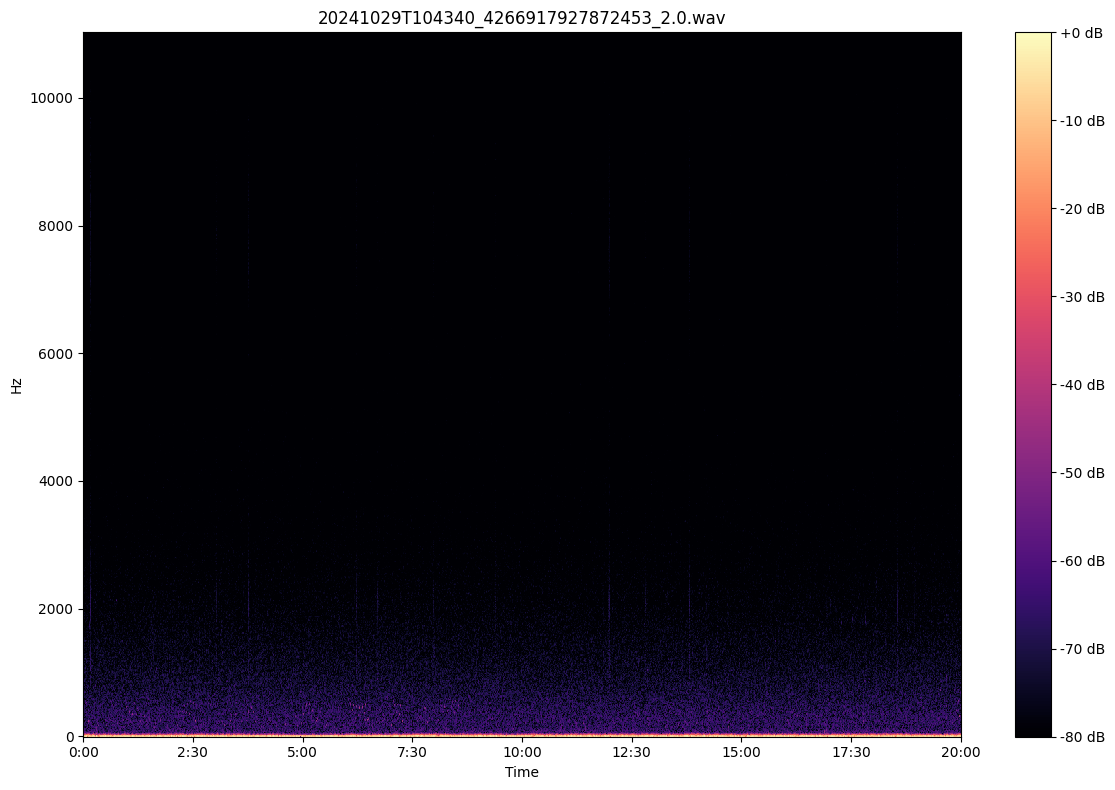

20241029T110342_4266917927872453_2.0.wav


: 

In [1]:
data_dir = '2024-10/'

import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

files = os.listdir(data_dir)
files.sort()

all_spectrograms = []
for file in files[100:]:
    #load wav files
    audio_file = os.path.join(data_dir, file)
    y, sr = librosa.load(audio_file)

    # Compute the spectrogram
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
    all_spectrograms.append(S_db)

    # Plot the spectrogram
    print(file)
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(file)
    plt.tight_layout()
    

    # Save the plot
    plt.savefig('spectrograms/' + file + '.png')

    plt.show()

# 12 minute spectra same as wave?
# look at jim's paper



In [2]:
import netCDF4

swift12_file = 'SWIFT12_telemetry_converted.nc'

nc = netCDF4.Dataset(swift12_file, 'r')

print(nc.variables.keys())

dict_keys(['freq_wavespectra', 'time', 'wavespectra_energy', 'wavespectra_a1', 'wavespectra_b1', 'wavespectra_a2', 'wavespectra_b2', 'CTdepth', 'ID', 'airpres', 'airpresstddev', 'airtemp', 'airtempstddev', 'date', 'driftdirT', 'driftdirTstddev', 'driftspd', 'driftspdstddev', 'lat', 'lon', 'metheight', 'peakwavedirT', 'peakwaveperiod', 'salinity', 'sigwaveheight', 'watertemp', 'winddirR', 'winddirRstddev', 'winddirT', 'winddirTstddev', 'windspd', 'windspdstddev'])


In [3]:
print(nc.variables['time'])

<class 'netCDF4.Variable'>
int64 time(time)
    units: seconds since 2024-10-27 18:36:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (325,)
filling on, default _FillValue of -9223372036854775806 used


In [6]:
325*12/60/24

2.7083333333333335

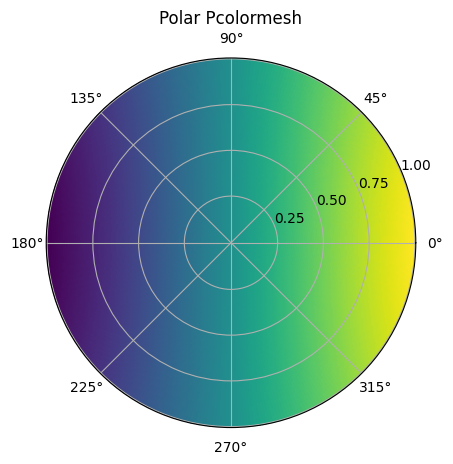

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
theta = np.linspace(0, 2 * np.pi, 360)
r = np.linspace(0, 1, 100)
R, Theta = np.meshgrid(r, theta)
Z = np.sin(R) * np.cos(Theta)

# Create a polar axes
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))

# Plot the pcolormesh
ax.pcolormesh(Theta, R, Z)

# Customize the plot
ax.set_title('Polar Pcolormesh')
ax.set_rticks([0.25, 0.5, 0.75, 1])  # Set radial ticks
ax.grid(True)

plt.show()